In [1]:
!pip install -Uqq Pillow
!pip install -Uqq fastbook

from fastai.vision.learner import *
from fastai.vision.all import *
import fastbook
from fastbook import *
import os
from PIL import Image
from IPython.display import display

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# List directory names in the input directory
for dirpath, dirnames, _ in os.walk('/kaggle/input'):
    for dirname in dirnames:
        print(os.path.join(dirpath, dirname))

/kaggle/input/lung-xrays-english-labels
/kaggle/input/lung-xrays-english-labels/archive
/kaggle/input/lung-xrays-english-labels/archive/Lower density (pneumothorax, pneumomediastinum, pneumoperitoneum)
/kaggle/input/lung-xrays-english-labels/archive/Degenerative infectious diseases (tuberculosis , sarcoidosis, proteinosis, fibrosis)
/kaggle/input/lung-xrays-english-labels/archive/Obstructive pulmonary diseases (emphysema, bronchopneumonia, bronchiectasis, embolism)
/kaggle/input/lung-xrays-english-labels/archive/Inflammatory processes (pneumonia)
/kaggle/input/lung-xrays-english-labels/archive/Normal
/kaggle/input/lung-xrays-english-labels/archive/Higher density (pleural effusion, atelectatic consolidation, hydrothorax, empyema)
/kaggle/input/lung-xrays-english-labels/archive/Mediastinal changes (pericarditis, arteriovenous malformations, lymph node enlargement)
/kaggle/input/lung-xrays-english-labels/archive/Chest changes (atelectasis, malformations, agenesis, hypoplasia)
/kaggle/inpu

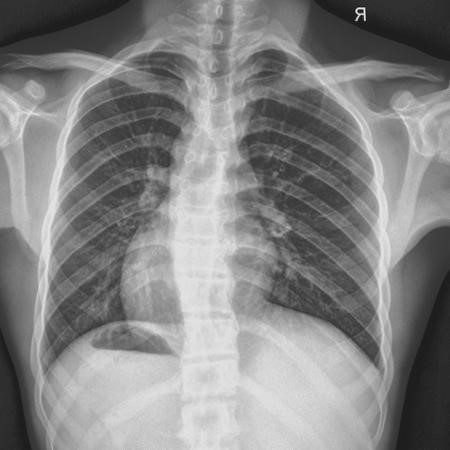

In [3]:
# Display an image
im_path = '/kaggle/input/lung-xrays-english-labels/archive/Normal/00 (1).jpeg'
im = Image.open(im_path)
display(im)

In [4]:
# Function for labeling data
def is_normal(x): return x[0].isupper()

# Defining a DataBlock for processing the images
xrays = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

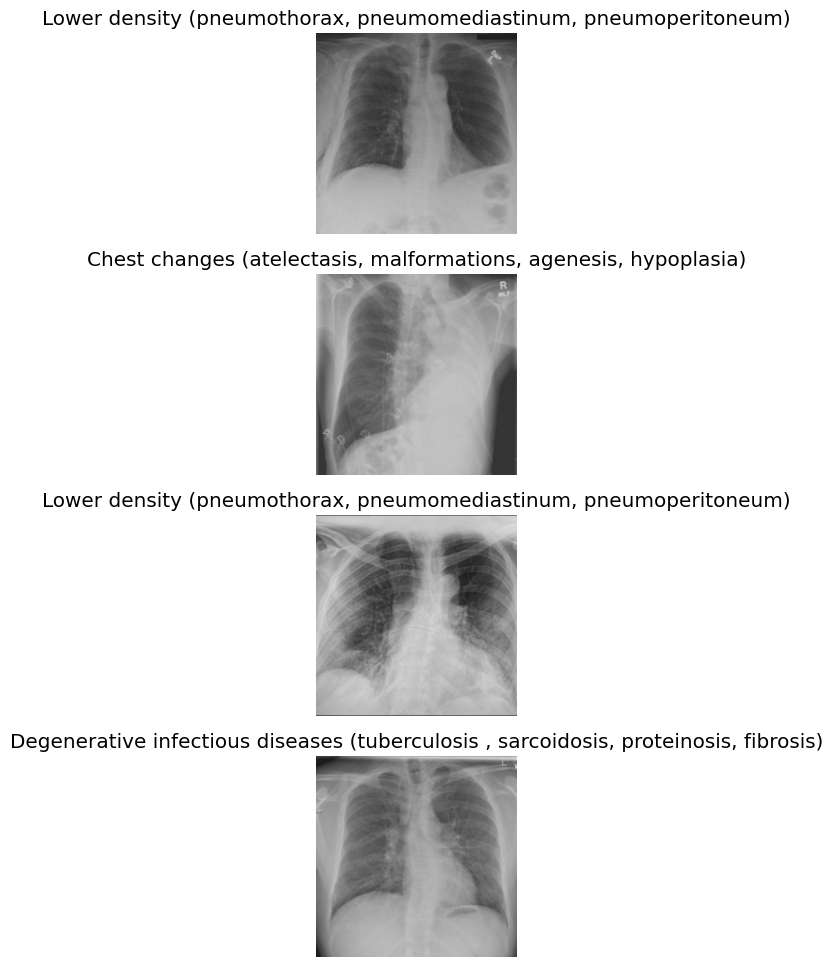

In [5]:
# Creating DataLoaders and displaying a batch of validation set images
path = '/kaggle/input/lung-xrays-english-labels/archive'
dls = xrays.dataloaders(path, bs=32, label_func=is_normal)
dls.valid.show_batch(max_n=4, nrows=4)

In [6]:
!pip install -Uqq timm

In [7]:
#Listing available ViT models

from timm import list_models
available_models = list_models(pretrained=True)
vit_models = [model for model in available_models if 'vit_' in model.lower()]
vit_models

['convit_base.fb_in1k',
 'convit_small.fb_in1k',
 'convit_tiny.fb_in1k',
 'crossvit_9_240.in1k',
 'crossvit_9_dagger_240.in1k',
 'crossvit_15_240.in1k',
 'crossvit_15_dagger_240.in1k',
 'crossvit_15_dagger_408.in1k',
 'crossvit_18_240.in1k',
 'crossvit_18_dagger_240.in1k',
 'crossvit_18_dagger_408.in1k',
 'crossvit_base_240.in1k',
 'crossvit_small_240.in1k',
 'crossvit_tiny_240.in1k',
 'davit_base.msft_in1k',
 'davit_small.msft_in1k',
 'davit_tiny.msft_in1k',
 'efficientvit_b0.r224_in1k',
 'efficientvit_b1.r224_in1k',
 'efficientvit_b1.r256_in1k',
 'efficientvit_b1.r288_in1k',
 'efficientvit_b2.r224_in1k',
 'efficientvit_b2.r256_in1k',
 'efficientvit_b2.r288_in1k',
 'efficientvit_b3.r224_in1k',
 'efficientvit_b3.r256_in1k',
 'efficientvit_b3.r288_in1k',
 'efficientvit_l1.r224_in1k',
 'efficientvit_l2.r224_in1k',
 'efficientvit_l2.r256_in1k',
 'efficientvit_l2.r288_in1k',
 'efficientvit_l2.r384_in1k',
 'efficientvit_l3.r224_in1k',
 'efficientvit_l3.r256_in1k',
 'efficientvit_l3.r320_in1

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.031262,0.298681,0.086053,02:23


epoch,train_loss,valid_loss,error_rate,time
0,0.344022,0.147613,0.043027,03:12
1,0.220080,0.090752,0.023739,03:11
2,0.096242,0.036172,0.011128,03:11
3,0.046492,0.023696,0.008160,03:11
4,0.030974,0.020727,0.006677,03:11


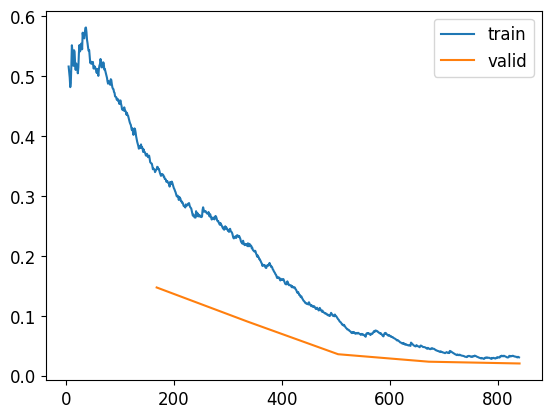

In [8]:
#Define a learner
learn = vision_learner(dls, 'vit_base_patch16_224.orig_in21k', metrics=error_rate, opt_func=Adam)

#Fine-tune the model
learn.fine_tune(epochs=5)
learn.recorder.plot_loss()